In [1]:
import cv2
import numpy as np

In [5]:
#select points of interest
cap = cv2.VideoCapture("f:/rene_video.mov")
count =0
coords=[]
road=[116, 109, 101]
def mouseclick(event,x,y,flags,params):
    global count
    if count<4:
        if event == cv2.EVENT_LBUTTONDOWN:
            count+=1;
            a =[x,y]
            print a
            coords.append(a)
    if event == cv2.EVENT_LBUTTONDBLCLK:
            print 'location: ' , x,y

cv2.namedWindow("frame")            
cv2.setMouseCallback("frame",mouseclick)
while True:
    _,frame = cap.read()
    
    cv2.imshow('frame',frame)
    
    k = cv2.waitKey(1)
    if k == 27:
        break
        
cap.release()
cv2.destroyAllWindows()


In [101]:
#select road color
cap = cv2.VideoCapture("f:/rene_video.mov")
def mouseclick(event,x,y,flags,params):
    if event == cv2.EVENT_RBUTTONDOWN:
            global road
            road = frame[x,y]
            print road 
            
cv2.namedWindow("frame")            
cv2.setMouseCallback("frame",mouseclick)
while _==True:
    _,frame = cap.read()
    
    cv2.imshow('frame',frame)
    
    k = cv2.waitKey(1)
    if k == 27:
        break
        
cap.release()
cv2.destroyAllWindows()


In [3]:
#check point is in polygon

import matplotlib.path as mplpath
bbPath = mplpath.Path(coords)
    
x =0

for i in range(frame.shape[0]):
    for j in range(frame.shape[1]):
        global x
        if bbPath.contains_point((i,j))==True:
                    x+=1
x = x*.95
print x


25964.45


In [4]:
#using irregular ROI
cap = cv2.VideoCapture('f:/rene_video.mov')

_,frame = cap.read()
count = 0
plt_var = []

while True:
    
    _,frame = cap.read()
    if _==False:
        break
    pts = np.array(coords, np.int32)
    pts = pts.reshape((-1,1,2))
    mask = np.zeros(frame.shape, dtype=np.uint8)
    ignore_mask_color = (255,)*frame.shape[2]
    cv2.fillConvexPoly(mask, pts, ignore_mask_color)
    frame = cv2.bitwise_and(frame,mask)
    threshold_lower = np.array(road)-20
    threshold_upper = np.array(road)+20
    msk = cv2.inRange(frame, threshold_lower, threshold_upper)
    img_masked = cv2.bitwise_and(frame,frame,mask=msk)
    img_masked = cv2.cvtColor(img_masked,cv2.COLOR_BGR2GRAY)
    cv2.imshow('original',frame)
    cv2.imshow("detect",img_masked)
    k = cv2.waitKey(5)
    if k ==27:
        break 
        
    
    z =np.sum(img_masked==road)
    if x-cv2.countNonZero(img_masked) > x*0.27:
        print '1',
    
    if x-cv2.countNonZero(img_masked) < x*0.15:
        print '0',
    plt_var.append(x-cv2.countNonZero(img_masked))
    count = count +1
cap.release()
cv2.destroyAllWindows()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


In [130]:
cv2.destroyAllWindows()

In [18]:
density = np.zeros((1,4))
density

array([[0., 0., 0., 0.]])

## For 4 lanes

In [10]:
import matplotlib.path as mplpath
bbPath = mplpath.Path(coords)
    
x =0

for i in range(frame.shape[0]):
    for j in range(frame.shape[1]):
        global x
        if bbPath.contains_point((i,j))==True:
                    x+=1
x = x*.95
print x

19491.15


In [ ]:
#using irregular ROI
cap1 = cv2.VideoCapture('g:/lane1.avi')
cap2 = cv2.VideoCapture('g:/lane2.avi')
cap3 = cv2.VideoCapture('g:/lane3.avi')
cap4 = cv2.VideoCapture('g:/lane4.avi')

count = 0
density = np.zeros((1,4))
lanetime = np.zeros((1,4))
minT = 24*10
maxT = 24*25
currentlane = 0

while True:
    
    _1,frame1 = cap1.read()
    _2,frame2 = cap2.read()
    _3,frame3 = cap3.read()
    _4,frame4 = cap4.read()
    
    if _1==False or _2==False or _3==False or _4==False:
        break
    pts = np.array(coords, np.int32)
    pts = pts.reshape((-1,1,2))
    mask = np.zeros(frame.shape, dtype=np.uint8)
    ignore_mask_color = (255,)*frame.shape[2]
    cv2.fillConvexPoly(mask, pts, ignore_mask_color)
    frame1= cv2.bitwise_and(frame1,mask)
    frame2= cv2.bitwise_and(frame2,mask)
    frame3= cv2.bitwise_and(frame3,mask)
    frame4= cv2.bitwise_and(frame4,mask)
    
    threshold_lower = np.array(road)-20
    threshold_upper = np.array(road)+20
    msk1 = cv2.inRange(frame1, threshold_lower, threshold_upper)
    img_masked1 = cv2.bitwise_and(frame1,frame1,mask=msk1)
    img_masked1 = cv2.cvtColor(img_masked1,cv2.COLOR_BGR2GRAY)
    
    msk2 = cv2.inRange(frame2, threshold_lower, threshold_upper)
    img_masked2 = cv2.bitwise_and(frame2,frame2,mask=msk2)
    img_masked2 = cv2.cvtColor(img_masked2,cv2.COLOR_BGR2GRAY)
    
    msk3 = cv2.inRange(frame3, threshold_lower, threshold_upper)
    img_masked3 = cv2.bitwise_and(frame3,frame3,mask=msk3)
    img_masked3 = cv2.cvtColor(img_masked3,cv2.COLOR_BGR2GRAY)
    
    msk4 = cv2.inRange(frame4, threshold_lower, threshold_upper)
    img_masked4 = cv2.bitwise_and(frame4,frame4,mask=msk4)
    img_masked4 = cv2.cvtColor(img_masked4,cv2.COLOR_BGR2GRAY)
    
    cv2.imshow("lane1",img_masked1)
    cv2.imshow("lane2",img_masked2)
    cv2.imshow("lane3",img_masked3)
    cv2.imshow("lane4",img_masked4)
    
    k = cv2.waitKey(24)
    
    if k ==27:
        break 
     
    if count > minT:
        if currentlane == 0:
            if x-cv2.countNonZero(img_masked1) < x*0.15:
                currentlane +=1
                currentlane =currentlane % 4
                count = 0
        elif currentlane == 1:
            if x-cv2.countNonZero(img_masked2) < x*0.15:
                currentlane +=1
                currentlane =currentlane % 4
                count = 0
        elif currentlane == 2:
            if x-cv2.countNonZero(img_masked3) < x*0.15:
                currentlane +=1
                currentlane =currentlane % 4
                count = 0
        elif currentlane == 3:
            if x-cv2.countNonZero(img_masked4) < x*0.15:
                currentlane +=1
                currentlane =currentlane % 4
                count = 0
                
             
        #density[0,1] = x-cv2.countNonZero(img_masked2)
        #density[0,2] = x-cv2.countNonZero(img_masked3)
        #density[0,3] = x-cv2.countNonZero(img_masked4)
    
    if count > maxT:
        currentlane +=1
        currentlane =currentlane % 4
        count = 0
    

    
    
    #print density[0,np.argmax(density)],

    
    
#    z =np.sum(img_masked==road)
#    if x-cv2.countNonZero(img_masked) > x*0.27:
#        print '1',
#    
#   if x-cv2.countNonZero(img_masked) < x*0.15:
#        print '0',
#    plt_var.append(x-cv2.countNonZero(img_masked))
    count = count +1
    print currentlane, count

cap1.release()
cap2.release()
cap3.release()
cap4.release()


cv2.destroyAllWindows()

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184
0 18

Text(0,0.5,'traffic')

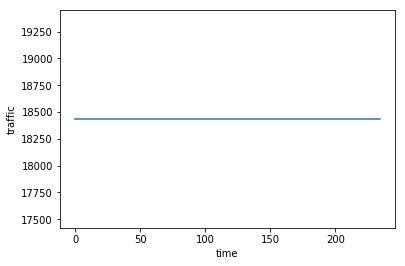

In [126]:
import matplotlib.pyplot as plt

k = [i for i in range(count)]
plt.plot(k,(plt_var))
plt.xlabel('time')
plt.ylabel('traffic')

In [113]:
frame.shape[0]*frame.shape[1]-x

902196L

In [120]:
x*0.9 - cv2.countNonZero(img_masked)

3758.600000000002

In [133]:
"""#using object detection(very slow)
cap = cv2.VideoCapture('f:/rene_video.mov')
_,frame = cap.read()
while True:
    
    _,frame = cap.read()
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    mask = np.zeros(frame.shape, dtype=np.uint8)

    
    cars = dcars.detectMultiScale(gray)
    for (a,b,c,d) in cars:
        cv2.rectangle(frame,(a,b),(a+c,b+d),(225,0,0),1)
    
    twhl = d2whl.detectMultiScale(gray)
    for (a,b,c,d) in twhl:
        cv2.rectangle(frame,(a,b),(a+c,b+d),(225,0,0),1)
    
    bus = dbus.detectMultiScale(gray)
    for (a,b,c,d) in bus:
        cv2.rectangle(frame,(a,b),(a+c,b+d),(225,0,0),1)
    
    cv2.imshow("detect",frame)
    
    k = cv2.waitKey(5)
    if k ==27:
        break
        
cap.release()
cv2.destroyAllWindows()"""

'#using object detection(very slow)\ncap = cv2.VideoCapture(\'f:/rene_video.mov\')\n_,frame = cap.read()\nwhile True:\n    \n    _,frame = cap.read()\n    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)\n    mask = np.zeros(frame.shape, dtype=np.uint8)\n\n    \n    cars = dcars.detectMultiScale(gray)\n    for (a,b,c,d) in cars:\n        cv2.rectangle(frame,(a,b),(a+c,b+d),(225,0,0),1)\n    \n    twhl = d2whl.detectMultiScale(gray)\n    for (a,b,c,d) in twhl:\n        cv2.rectangle(frame,(a,b),(a+c,b+d),(225,0,0),1)\n    \n    bus = dbus.detectMultiScale(gray)\n    for (a,b,c,d) in bus:\n        cv2.rectangle(frame,(a,b),(a+c,b+d),(225,0,0),1)\n    \n    cv2.imshow("detect",frame)\n    \n    k = cv2.waitKey(5)\n    if k ==27:\n        break\n        \ncap.release()\ncv2.destroyAllWindows()'